In [1]:
import keras
import matplotlib.pyplot as plt


2024-10-31 00:58:30.951990: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-31 00:58:30.961263: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-31 00:58:30.975463: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-31 00:58:30.979358: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-31 00:58:30.988138: I tensorflow/core/platform/cpu_feature_guar

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

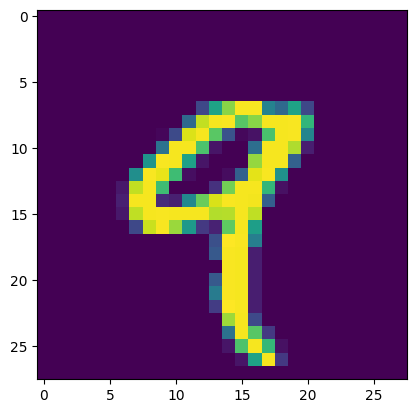

In [3]:
digit = train_images[4]
plt.imshow(digit,  cmap='viridis')
plt.show()

In [4]:
train_images.ndim

3

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
model = keras.Sequential([keras.layers.Dense(512, activation="relu"), keras.layers.Dense(10, activation="softmax")])

指定编译

In [9]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

I0000 00:00:1730307513.372551   37995 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730307513.452625   37995 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730307513.452671   37995 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730307513.455444   37995 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730307513.455480   37995 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [10]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32")/255

In [11]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


I0000 00:00:1730307514.431272   38042 service.cc:146] XLA service 0x7f317c01c320 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730307514.431302   38042 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 SUPER, Compute Capability 7.5
2024-10-31 00:58:34.441364: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-31 00:58:34.466459: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


136/469 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7919 - loss: 0.7119

I0000 00:00:1730307514.896370   38042 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8722 - loss: 0.4421
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9659 - loss: 0.1185
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9787 - loss: 0.0734
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9855 - loss: 0.0495
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9891 - loss: 0.0365


In [12]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


In [13]:
predictions[0]

array([1.2439359e-08, 8.3900433e-09, 8.0712171e-06, 2.1673630e-05,
       3.2969724e-11, 7.2378754e-08, 1.2446216e-12, 9.9996936e-01,
       3.7635864e-08, 7.9266812e-07], dtype=float32)

In [14]:
predictions[0].argmax()

7

In [15]:
predictions[0][7]

0.99996936

In [16]:
test_labels[0]

7

In [17]:
train_images.ndim

2

In [18]:
train_labels[4]

9